**Name - Aniruddha Pradip Pande**<br>
**PRN - 202201040023**<br>
**Deep Learning (Batch 1)**




Accuracy (Scikit-Learn): 0.7406


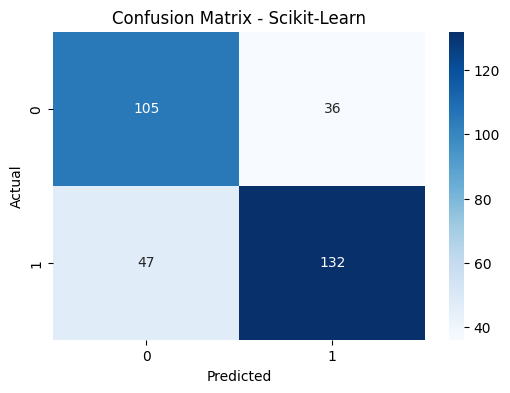

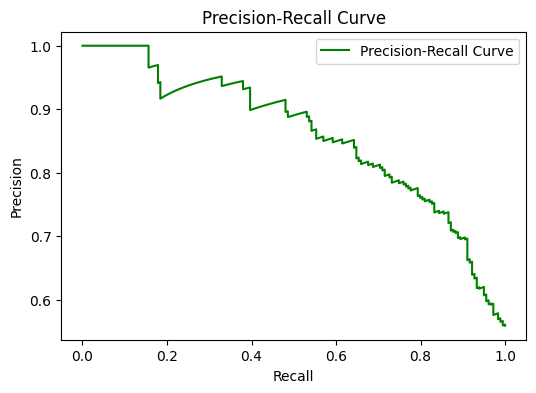

Accuracy (Keras): 0.7437


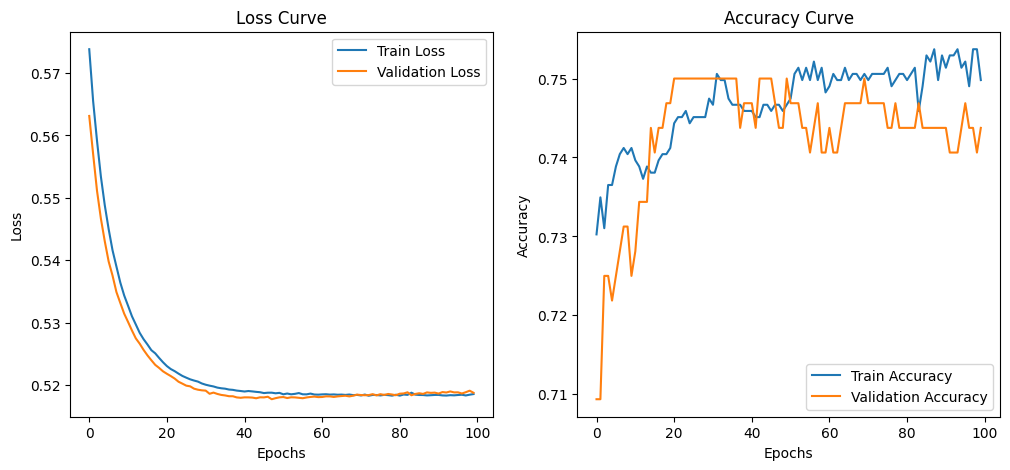

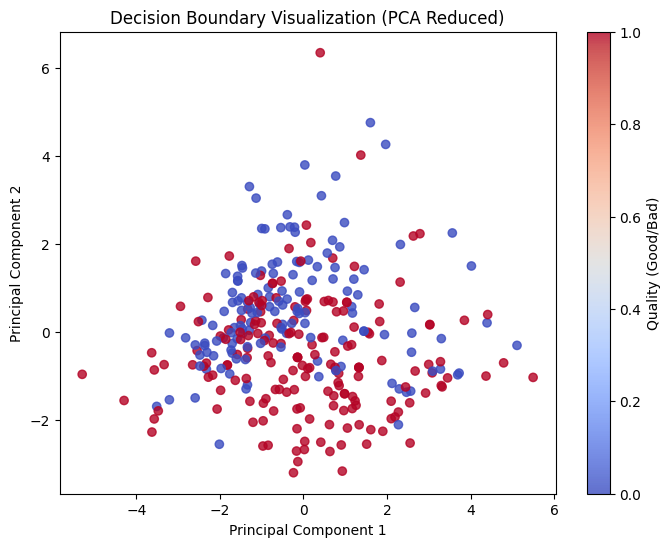

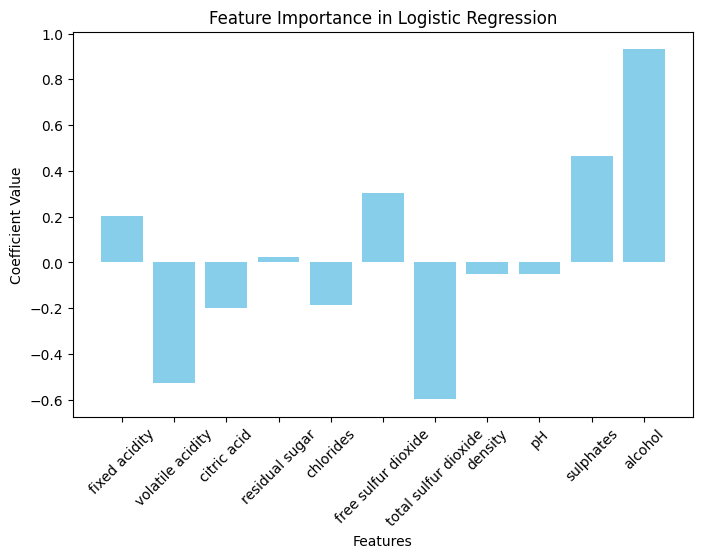

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.decomposition import PCA

# Load the Wine Quality dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

# Convert quality scores into binary classification (Good: 6 or higher, Bad: below 6)
df['quality'] = (df['quality'] >= 6).astype(int)

# Selecting relevant features
features = df.columns[:-1]  # All columns except 'quality'
X = df[features].values
y = df['quality'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression using Scikit-Learn
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_lib = accuracy_score(y_test, y_pred)
print(f'Accuracy (Scikit-Learn): {accuracy_lib:.4f}')

# Confusion Matrix for Scikit-Learn Model
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Scikit-Learn')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Logistic Regression using Keras
model_keras = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(1, activation='sigmoid')
])
model_keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_keras.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test))
accuracy_keras = model_keras.evaluate(X_test, y_test, verbose=0)[1]
print(f'Accuracy (Keras): {accuracy_keras:.4f}')

# Plot Loss & Accuracy (Keras Model)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

# PCA for Decision Boundary Visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

plt.figure(figsize=(8,6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', alpha=0.8)
plt.title('Decision Boundary Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Quality (Good/Bad)')
plt.show()

# Feature Importance using Logistic Regression Coefficients
importance = model.coef_[0]
plt.figure(figsize=(8,5))
plt.bar(features, importance, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.xticks(rotation=45)
plt.show()


Accuracy (Scratch Logistic Regression): 0.7312


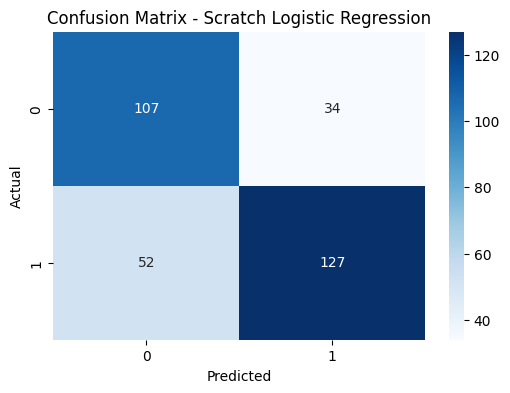

In [ ]:
# Load the Wine Quality dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

# Convert quality scores into binary classification (Good: 6 or higher, Bad: below 6)
df['quality'] = (df['quality'] >= 6).astype(int)

# Selecting relevant features
features = df.columns[:-1]  # All columns except 'quality'
X = df[features].values
y = df['quality'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Scratch Implementation of Logistic Regression
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

# Train Scratch Model
scratch_model = LogisticRegressionScratch(lr=0.01, epochs=1000)
scratch_model.fit(X_train, y_train)
y_pred_scratch = scratch_model.predict(X_test)

# Evaluate Scratch Model
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print(f'Accuracy (Scratch Logistic Regression): {accuracy_scratch:.4f}')

# Confusion Matrix for Scratch Model
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_scratch), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Scratch Logistic Regression')
plt.show()



Accuracy (Keras): 0.7531


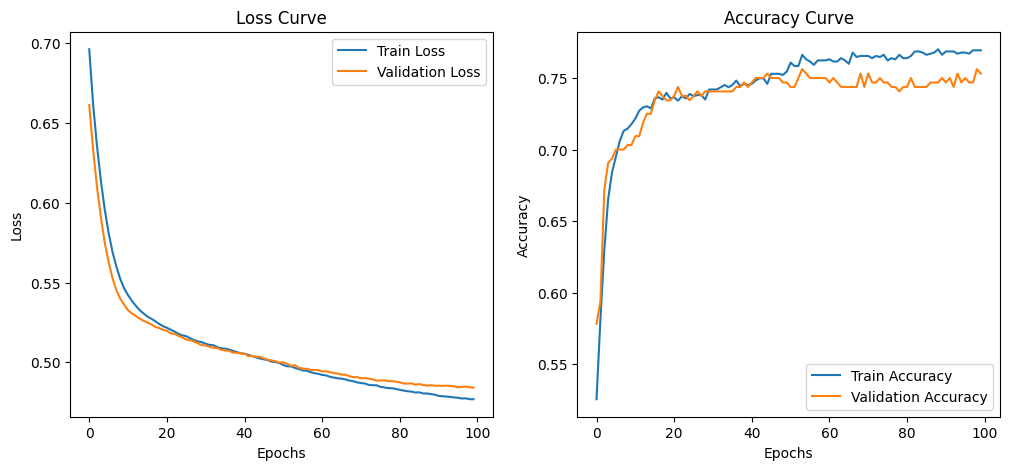

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


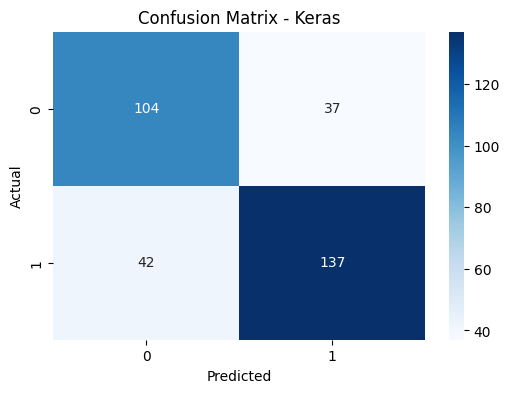

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


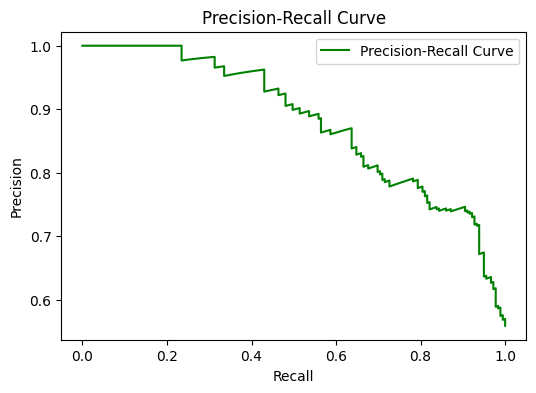

In [ ]:

# Load the Wine Quality dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

# Convert wine quality into a binary classification problem (Good: 1 if quality >= 6, else Bad: 0)
df['quality'] = (df['quality'] >= 6).astype(int)

# Selecting features
features = df.columns[:-1]  # Exclude 'quality' column from features
X = df[features].values  # Independent variables
y = df['quality'].values  # Target variable

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Neural Network model using Keras
model_keras = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer (number of features)
    keras.layers.Dense(10, activation='relu'),      # Hidden layer with 10 neurons
    keras.layers.Dense(1, activation='sigmoid')     # Output layer (binary classification)
])

# Compile the model
model_keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_keras.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test))

# Evaluate the model on the test data
accuracy_keras = model_keras.evaluate(X_test, y_test, verbose=0)[1]
print(f'Accuracy (Keras): {accuracy_keras:.4f}')

# Plot Loss & Accuracy curves (Keras Model)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

# Confusion Matrix for Keras Model
y_pred_keras = (model_keras.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to class labels
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_keras), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Keras')
plt.show()

# Precision-Recall Curve for Keras Model
precision, recall, _ = precision_recall_curve(y_test, model_keras.predict(X_test))
plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


Epoch 0/100 - Loss: 1.3465
Epoch 10/100 - Loss: 1.4113
Epoch 20/100 - Loss: 1.4120
Epoch 30/100 - Loss: 1.4211
Epoch 40/100 - Loss: 1.4193
Epoch 50/100 - Loss: 1.4188
Epoch 60/100 - Loss: 1.4185
Epoch 70/100 - Loss: 1.4222
Epoch 80/100 - Loss: 1.4252
Epoch 90/100 - Loss: 1.4239
Accuracy (Scratch): 0.6969


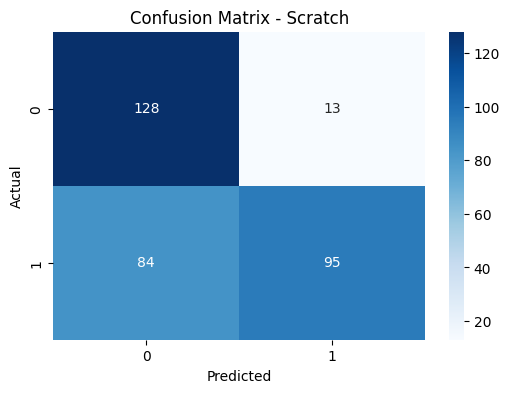

In [ ]:
# Load the Wine Quality dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

# Convert wine quality into a binary classification problem (Good: 1 if quality >= 6, else Bad: 0)
df['quality'] = (df['quality'] >= 6).astype(int)

# Selecting features
features = df.columns[:-1]  # Exclude 'quality' column from features
X = df[features].values  # Independent variables
y = df['quality'].values  # Target variable

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize hyperparameters
input_size = X_train.shape[1]  # Number of input features
hidden_size = 10  # Number of hidden units
output_size = 1  # Binary classification (0 or 1)
learning_rate = 0.01
epochs = 100

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size)  # Weights between input and hidden layer
b1 = np.zeros((1, hidden_size))  # Biases for hidden layer
W2 = np.random.randn(hidden_size, output_size)  # Weights between hidden and output layer
b2 = np.zeros((1, output_size))  # Biases for output layer

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Train the neural network
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X_train, W1) + b1
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, W2) + b2
    y_pred = sigmoid(output_layer_input)  # Predicted output

    # Calculate loss (binary cross-entropy)
    loss = -np.mean(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred))

    # Backpropagation (calculate gradients)
    d_output = y_pred - y_train.reshape(-1, 1)  # Error at output layer
    d_W2 = np.dot(hidden_layer_output.T, d_output)
    d_b2 = np.sum(d_output, axis=0, keepdims=True)

    d_hidden = np.dot(d_output, W2.T) * sigmoid_derivative(hidden_layer_output)  # Error at hidden layer
    d_W1 = np.dot(X_train.T, d_hidden)
    d_b1 = np.sum(d_hidden, axis=0, keepdims=True)

    # Update weights and biases
    W1 -= learning_rate * d_W1
    b1 -= learning_rate * d_b1
    W2 -= learning_rate * d_W2
    b2 -= learning_rate * d_b2

    if epoch % 10 == 0:  # Print loss every 10 epochs
        print(f'Epoch {epoch}/{epochs} - Loss: {loss:.4f}')

# Final prediction after training
hidden_layer_input = np.dot(X_test, W1) + b1
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, W2) + b2
y_pred_scratch = sigmoid(output_layer_input)

# Convert probabilities to binary class labels (0 or 1)
y_pred_scratch = (y_pred_scratch > 0.5).astype(int)

# Evaluate accuracy
accuracy_scratch = np.mean(y_pred_scratch == y_test.reshape(-1, 1))
print(f'Accuracy (Scratch): {accuracy_scratch:.4f}')

# Confusion Matrix and ROC Curve (similar to Keras evaluation)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_scratch), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Scratch')
plt.show()


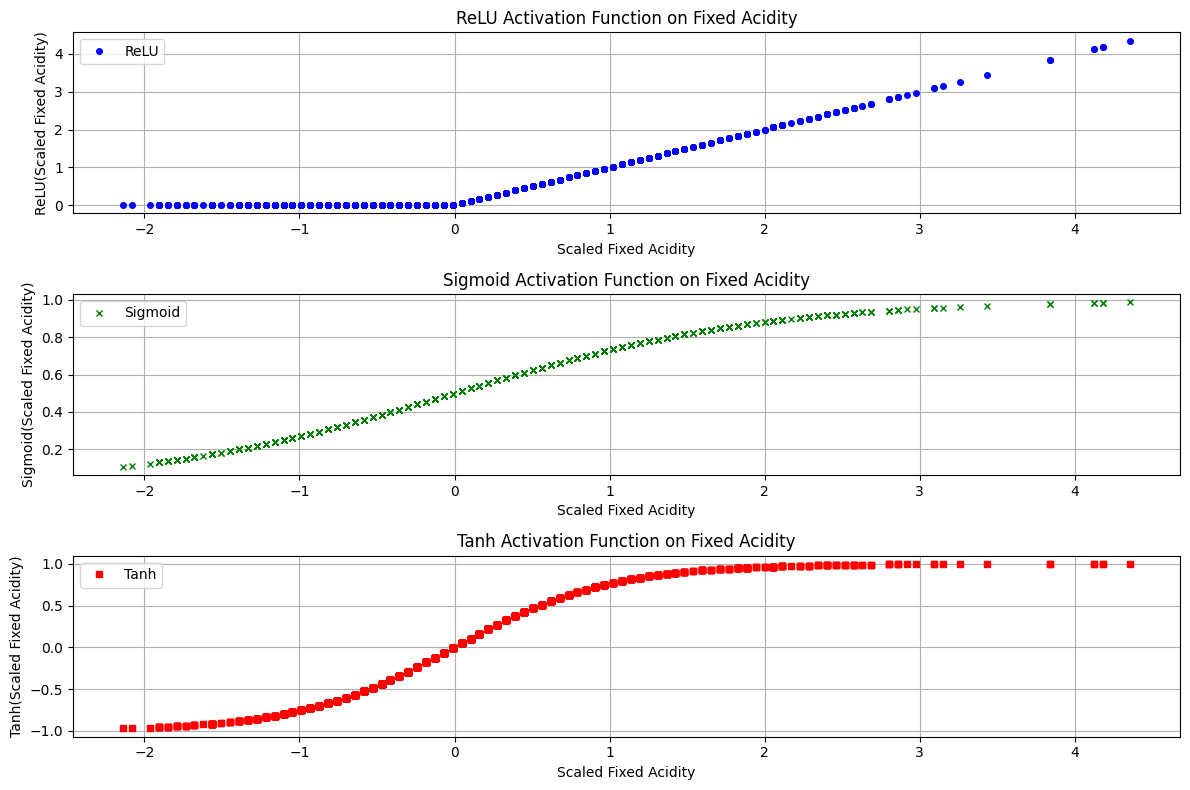

In [ ]:
# Load the Wine Quality dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

# Select the 'fixed acidity' column as our feature (X)
X = df['fixed acidity'].values

# Standardize the feature (important for activation functions)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1)).flatten()  # Reshape and standardize

# Apply activation functions on the 'fixed acidity' feature
y_relu = np.maximum(0, X_scaled)  # ReLU
y_sigmoid = 1 / (1 + np.exp(-X_scaled))  # Sigmoid
y_tanh = np.tanh(X_scaled)  # Tanh

# Create subplots to display the activation functions
plt.figure(figsize=(12, 8))

# ReLU plot
plt.subplot(3, 1, 1)
plt.plot(X_scaled, y_relu, label="ReLU", color='blue', marker='o', linestyle='none', markersize=4)
plt.title("ReLU Activation Function on Fixed Acidity")
plt.xlabel("Scaled Fixed Acidity")
plt.ylabel("ReLU(Scaled Fixed Acidity)")
plt.grid(True)
plt.legend()

# Sigmoid plot
plt.subplot(3, 1, 2)
plt.plot(X_scaled, y_sigmoid, label="Sigmoid", color='green', marker='x', linestyle='none', markersize=4)
plt.title("Sigmoid Activation Function on Fixed Acidity")
plt.xlabel("Scaled Fixed Acidity")
plt.ylabel("Sigmoid(Scaled Fixed Acidity)")
plt.grid(True)
plt.legend()

# Tanh plot
plt.subplot(3, 1, 3)
plt.plot(X_scaled, y_tanh, label="Tanh", color='red', marker='s', linestyle='none', markersize=4)
plt.title("Tanh Activation Function on Fixed Acidity")
plt.xlabel("Scaled Fixed Acidity")
plt.ylabel("Tanh(Scaled Fixed Acidity)")
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
# Load the Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# Select relevant features and target
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
df = df[features + ['quality']]

df['quality'] = (df['quality'] >= 6).astype(int)  # Convert quality to binary classification (Good: 1, Bad: 0)

# Features and target
X = df[features]  # Features
y = df['quality']  # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get predicted probabilities for test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # We need probabilities for class '1'

# Calculate Log Loss for all examples
logloss = log_loss(y_test, y_pred_proba)

# Simulate correct (high probability for the right class) and incorrect predictions (low probability for the right class)
y_true = y_test.to_numpy()
y_pred_correct = y_pred_proba[:8]  # First 8 correct predictions (high probabilities for class 1)
y_pred_incorrect = y_pred_proba[8:]  # Last 2 incorrect predictions (low probabilities for class 1)

# Compute Log Loss for Correct and Incorrect Predictions
correct_logloss = -np.mean(y_true[:8] * np.log(y_pred_correct) + (1 - y_true[:8]) * np.log(1 - y_pred_correct))
incorrect_logloss = -np.mean(y_true[8:] * np.log(y_pred_incorrect) + (1 - y_true[8:]) * np.log(1 - y_pred_incorrect))

# Display results
print(f"Total Log Loss for Test Set: {logloss:.4f}")
print(f"Log Loss for Correct Predictions: {correct_logloss:.4f}")
print(f"Log Loss for Incorrect Predictions: {incorrect_logloss:.4f}")


Total Log Loss for Test Set: 0.5195
Log Loss for Correct Predictions: 0.4277
Log Loss for Incorrect Predictions: 0.5219


Total Log Loss for Test Set: 0.5195
Log Loss for Correct Predictions: 0.4277
Log Loss for Incorrect Predictions: 0.5219


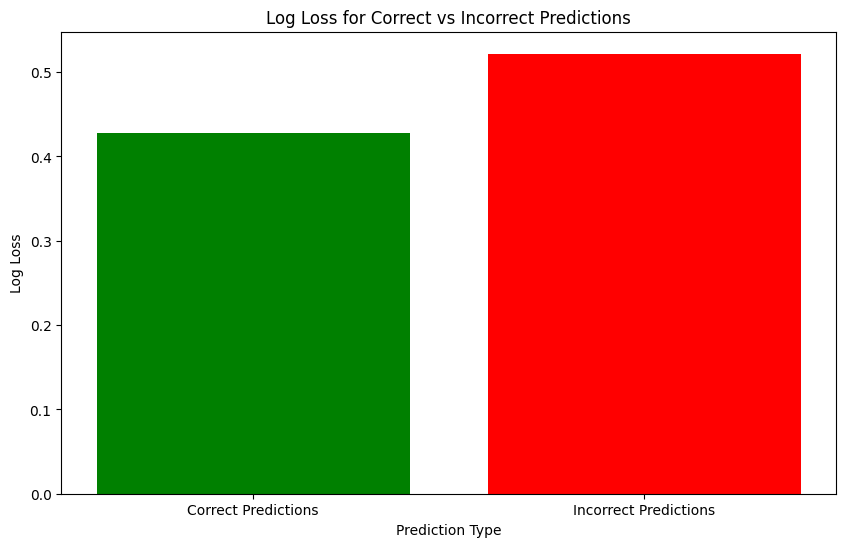

In [ ]:
from sklearn.metrics import log_loss

# Load the Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# Convert wine quality into a binary classification problem
# Quality >= 6 is considered 'good' (1), otherwise 'bad' (0)
df['quality'] = (df['quality'] >= 6).astype(int)

# Features and target
X = df.drop(columns=['quality'])  # Features
y = df['quality']  # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get predicted probabilities for test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # We need probabilities for class '1'

# Calculate Log Loss for all examples
logloss = log_loss(y_test, y_pred_proba)

# Simulate correct (high probability for the right class) and incorrect predictions (low probability for the right class)
y_true = y_test.to_numpy()

y_pred_correct = y_pred_proba[:8]  # First 8 correct predictions (high probabilities for class 1)
y_pred_incorrect = y_pred_proba[8:]  # Last 2 incorrect predictions (low probabilities for class 1)

# Compute Log Loss for Correct and Incorrect Predictions
correct_logloss = -np.mean(y_true[:8] * np.log(y_pred_correct) + (1 - y_true[:8]) * np.log(1 - y_pred_correct))
incorrect_logloss = -np.mean(y_true[8:] * np.log(y_pred_incorrect) + (1 - y_true[8:]) * np.log(1 - y_pred_incorrect))

# Display results
print(f"Total Log Loss for Test Set: {logloss:.4f}")
print(f"Log Loss for Correct Predictions: {correct_logloss:.4f}")
print(f"Log Loss for Incorrect Predictions: {incorrect_logloss:.4f}")

# Visualize Log Loss
plt.figure(figsize=(10, 6))

# Log Loss bar plot for correct and incorrect predictions
log_losses = [correct_logloss, incorrect_logloss]
categories = ['Correct Predictions', 'Incorrect Predictions']

plt.bar(categories, log_losses, color=['green', 'red'])
plt.title('Log Loss for Correct vs Incorrect Predictions')
plt.xlabel('Prediction Type')
plt.ylabel('Log Loss')
plt.show()
